#This project need to be fixed 
Work on the question and what this project intent to answer so we can save time cleaing the data 

In [ ]:
#Insert the project 2

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 


Load the data to process it and check the structure of the dataframe 

In [7]:
df = pd.read_csv('http://data.insideairbnb.com/australia/nsw/sydney/2022-06-06/visualisations/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86767,151.22497,Private room,65,90,195,2020-03-13,1.28,1,364,0,NaN
1,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80084,151.26378,Entire home/apt,470,2,3,2021-06-01,0.04,2,66,0,Exempt
2,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,79,2,414,2022-06-02,3.31,1,258,40,PID-STRA-24061-7
3,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130,90,76,2020-01-03,0.54,1,0,0,NaN
4,58506,"Studio Yindi @ Mosman, Sydney",279955,John,NaN,Mosman,-33.81748,151.23484,Entire home/apt,150,2,331,2022-06-01,2.38,1,204,44,PID-STRA-2810


In [11]:
print(df.shape[0])
print(df.shape[1])

20632
18


Since data types is important when we dealing with data we first check how the df is structured 

In [12]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

We check which colums has missing values by order 

In [17]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.591363
reviews_per_month                 0.258530
last_review                       0.258530
name                              0.000339
host_name                         0.000097
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

We have to clean the data set so we can do it with a function 

In [ ]:
def listing_clean(data):
    data['id'] = data['id'].astype(str)
    data['host_id'] = data['host_id'].astype(str)
    data.last_review = pd.to_datetime(data.last_review, format='%Y/%m/%d')
    data = data.drop(columns=['neighbourhood_group'])
    data['availability_perc'] = data['availability_365']/365
    print('Number of Sydney Airbnb Listings:', data.shape[0])
    print('Number of features in dataset:', data.shape[1])
    print('Avarage price is : $',round(data.price.mean()))
    print('Number of hosts/suppliers: ', data.host_id.nunique())
    print('Number of suburbs: ', data.neighbourhood.nunique())
    return data


#we clean the df with our function 

In [ ]:
df = listing_clean(df)
df.head()

check the shape will give us a perseption of how big is it 

In [ ]:
df.shape

＊＊＊＊＊＊＊＊＊＊＊

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/unemployment.csv")
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

Let’s see if this dataset contains missing values or not:

In [4]:
print(data.isnull().sum())

Region                                      0
Date                                        0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


While analyzing the missing values, I found that the column names are not correct. So, for a better understanding of this data, I will rename all the columns:

In [5]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

Now let’s have a look at the correlation between the features of this dataset:

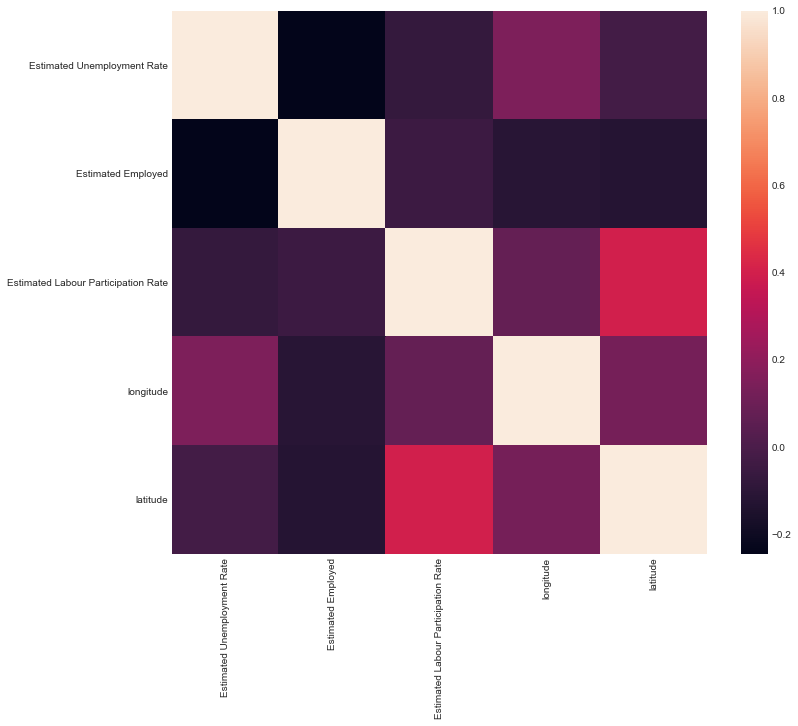

In [6]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())
plt.show()

#Correlation between variables 
# white perfect correlation black no corretation at all 

Now let’s visualize the data to analyze the unemployment rate. I will first take a look at the estimated number of employees according to different regions of India:

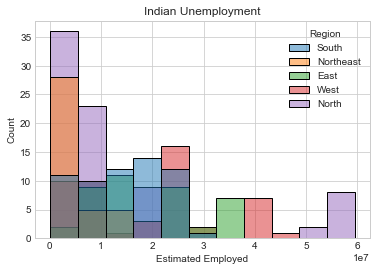

In [7]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

Now let’s see the unemployment rate according to different regions of India:

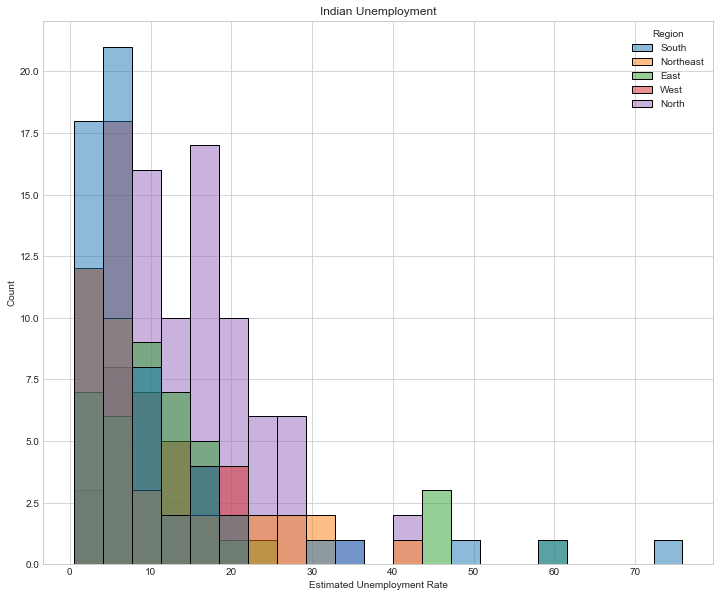

In [8]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()

Now let’s create a dashboard to analyze the unemployment rate of each Indian state by region. For this, I’ll use a sunburst plot:

##FIX IT

In [10]:
unemploment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"], 
                     values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()